## Predicting Mental Helath - Extract Useful Insight from Data <br>
Extracting useful insights from data involves a combination of data preparation, exploratory analysis, statistical techniques, and visualization.



# Mount Google Drive

In [1]:
# Import necessary python libraries - EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for evaluation, heatmap,..
# libraries - modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings if shure

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Reading depression datset - source: '/kaggle/input/depression-dataset/depression_data.csv'
df = pd.read_csv('depression_data.csv')


In [3]:
# Dataset Overview
print(df.info())  # Check data types and null values
print(df.describe())  # Get basic statistics for numerical columns
print(df.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [4]:
# see if df is read properly and list few first and last columns
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [5]:
df.tail()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No
413767,Joseph Johnson,62,Widowed,Master's Degree,0,Former,Moderate,Employed,107125.74,Moderate,Healthy,Good,No,Yes,No,No


# Data Processing/Preparation
 Data preprocessing is the process of generating raw data for machine learning models. This is the first step in creating a machine-learning model. This is the most complex and time-consuming aspect of data science. Data preprocessing is required in machine learning algorithms to reduce its complexities. In most cases, the following pre-processing menthods will be exercised:
 - Data Cleaning
    - Remove inaccuracies: Handle missing values, remove duplicates, and correct errors.
    - Standardize data: Convert data into a consistent format.
    - Outlier detection: Use techniques like Z-scores or the IQR method to spot anomalies
 - Feature Engineering
    - Create new meaningful variables (e.g., encoding).
    - Transform data (e.g., log transformation, normalization).
 - Data Integration
    - Combine datasets for enriched insights (e.g., joining customer and subscription data).
 - Data Sampling
    - Use representative subsets for faster analysis without sacrificing accuracy.



# Label Encoding
- A technique for encoding categorical variables as numeric values, with each category assigned a unique integer.
- Label encoding can be useful for some machine learning algorithms that require numeric inputs, as it allows categorical data to be represented in a way that the algorithms can understand.
- An arbitrary ordering of the categories created as a result may not necessarily reflect any meaningful relationship between categories

Random Forest predictive model

In [6]:
# Get column names
column_names = df.columns
print(column_names)

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')


In [7]:
# Drop PII column,'Name'])
df = df.drop(columns=['Name'])

In [8]:
#Omit decimal digits-relatively high income figures
df['Income']=df['Income'].astype('int32')

# Narratives and Assumptions of using Random Forest Predictive model

When using a Random Forest predictive model for a categorical response variable (classification), several assumptions and considerations apply.
Here are the key assumptions:
1. No Strict Distributional Assumptions
 - Random Forest does not assume any specific distribution for the predictor variables or the response variable. It is non-parametric, making it suitable for a wide range of data types.
2. Sufficient Data
 - The method assumes there is enough data to grow multiple decision trees without overfitting. The larger the dataset, the better the model's performance and generalizability.
3. Independence of Observations
 - Observations in the dataset are assumed to be independent of each other. Violations of this assumption may require adjustments or different modeling approaches.
4. Relevance of Predictors
 - The model assumes that the predictor variables have a meaningful relationship with the categorical response variable. Irrelevant predictors can reduce model efficiency but are less harmful compared to linear models.
5. No Perfect Multicollinearity
 - While Random Forest can handle correlated predictors better than some other models, highly correlated features may still reduce the interpretability and importance ranking of predictors.
6. Balanced Classes (Optional)
 - Random Forest performs better with balanced class distributions. If the categorical response variable is imbalanced, techniques like oversampling, undersampling, or class weighting might be necessary.
7. Sufficient Feature Diversity
 - The model assumes there is enough variability in the predictor variables to build diverse decision trees. Lack of variability could lead to redundant trees and reduced accuracy.
8. Handling of Missing Data
 - Random Forest can handle missing values in predictor variables using internal methods, but excessive missingness might still impact performance.
9. Feature Independence within Trees
 - At each split in a tree, the model selects the best predictor independently of others. It does not assume interdependence among predictors at this stage.
10. Bootstrap Sampling
 - The algorithm assumes that bootstrapping (sampling with replacement) provides a sufficiently diverse set of training samples for constructing decision trees.

Key Considerations
 -	Overfitting Risk: Although Random Forest reduces overfitting compared to individual decision trees, using too many features or shallow trees might lead to underfitting.
 - Feature Scaling: Random Forest does not require scaling (e.g., normalization or standardization), as it is based on splits rather than distance metrics.
By adhering to these assumptions and addressing potential challenges (e.g., class imbalance, missing data), we can maximize the performance of a Random Forest model for categorical response variables.


# Exploratory Data Analysis (EDA)

1. Data Overview
Loading and Inspecting the Data:
Check for missing values.
Understand the data types of each column.
View basic statistics (mean, median, mode, etc.) of numerical features.
Identify categorical columns and their frequency distribution.

2. Univariate Analysis
Numerical Columns:
Visualize the distribution of numerical variables like Age, Income, etc., using histograms, box plots, and density plots.
Use descriptive statistics to summarize their central tendency (mean, median) and spread (standard deviation, range).

Categorical Columns:
Use bar plots to visualize the frequency distribution of categorical features like Marital Status, Education Level, etc.

3. Bivariate Analysis
Correlation between numerical variables:
Calculate and visualize the correlation matrix using a heatmap for features like Age and Income.
Examine how these numerical features relate to the dependent variable History of Mental Illness (binary: Yes/No).

Categorical vs. Categorical:
Use stacked bar plots or grouped bar plots to compare categorical variables like Marital Status, Education Level, Smoking Status, and others against History of Mental Illness.

Numerical vs. Categorical:
Box plots or violin plots can help examine how numerical variables like Age and Income vary with History of Mental Illness.

4. Multivariate Analysis
Visualize interactions between multiple features using pair plots, scatter matrix, or PCA (Principal Component Analysis) if the data is high-dimensional.

5. Missing Values & Data Imbalance
Investigate if any features have missing values and choose appropriate imputation strategies (mean, median, mode imputation for numerical features, or the most frequent category for categorical features).
Check the distribution of the target variable (History of Mental Illness) and handle class imbalances (oversampling, undersampling, or class weights).

6. Feature Engineering
Explore relationships between features and the target variable for possible feature transformations or new features.

In [9]:
# Preprocessing
# - Numerical variables: Scaling
# - Categorical variables: One-hot encoding
numerical_features = ['Age', 'Income', 'Number of Children']
categorical_features = ['Marital Status','Education Level', 'Physical Activity Level', 'Employment Status','Smoking Status', 'Alcohol Consumption',
       'Dietary Habits','Sleep Patterns', 'History of Substance Abuse', 'Family History of Depression','Chronic Medical Conditions']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features),

    ]
)


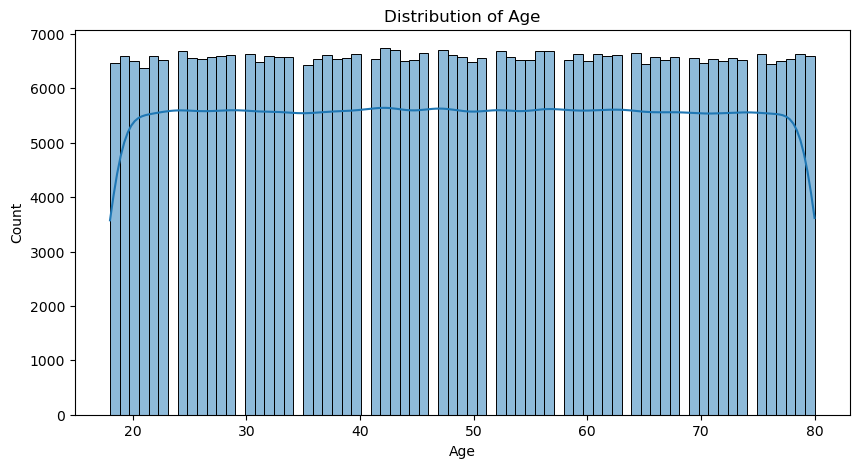

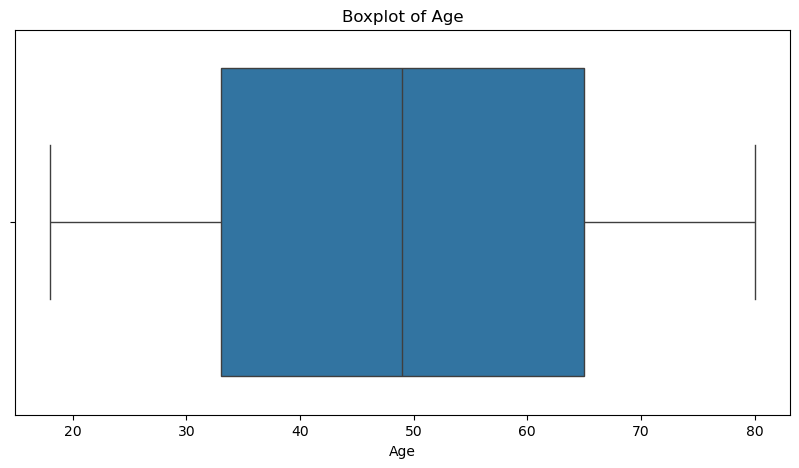

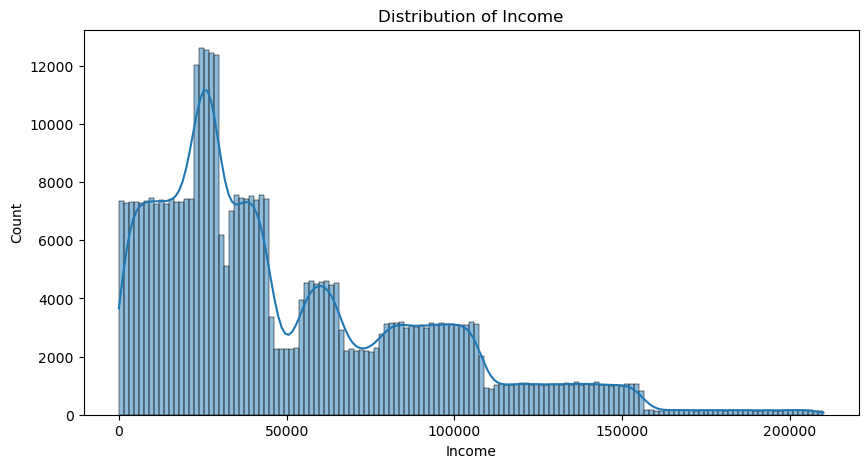

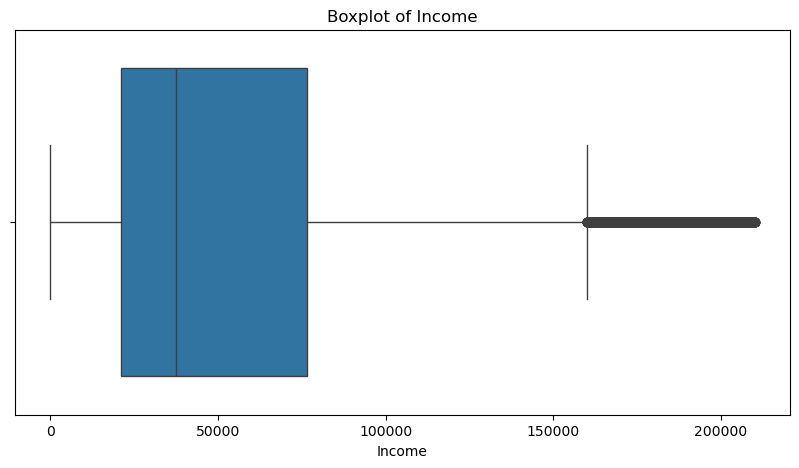

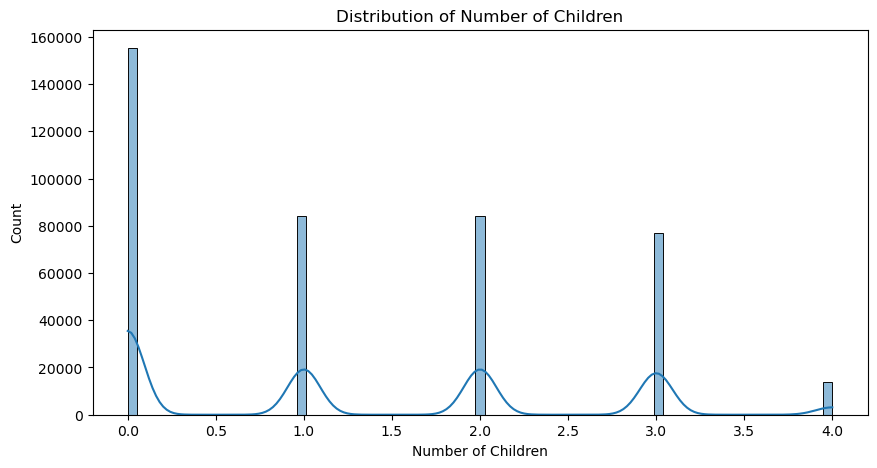

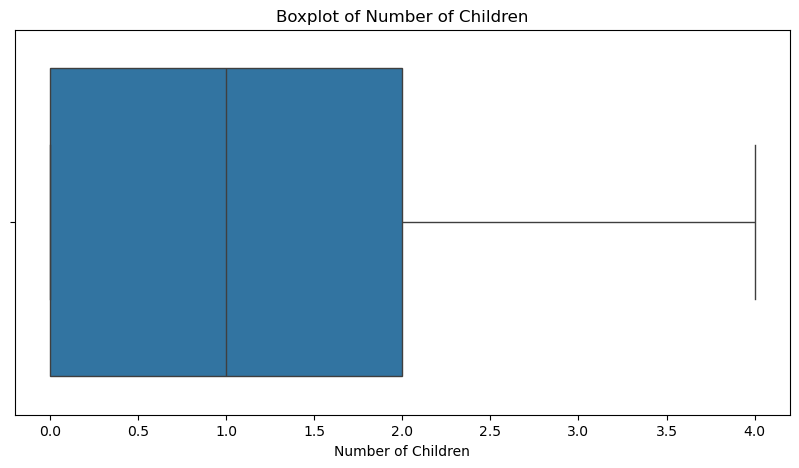

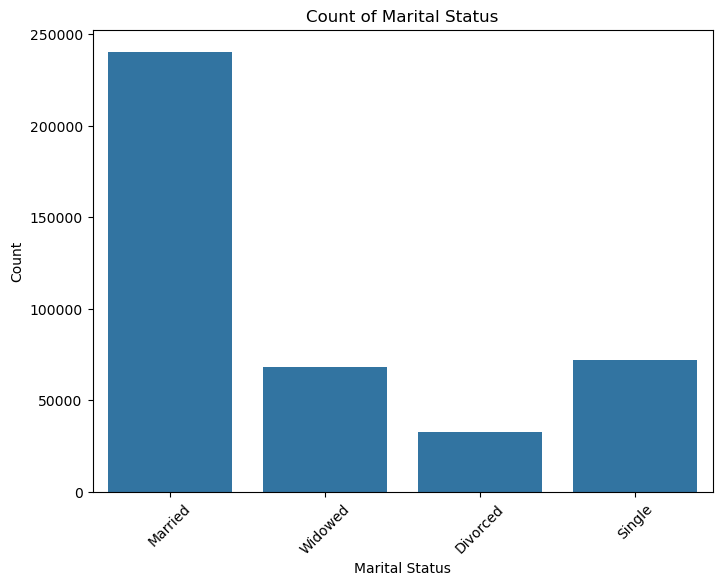

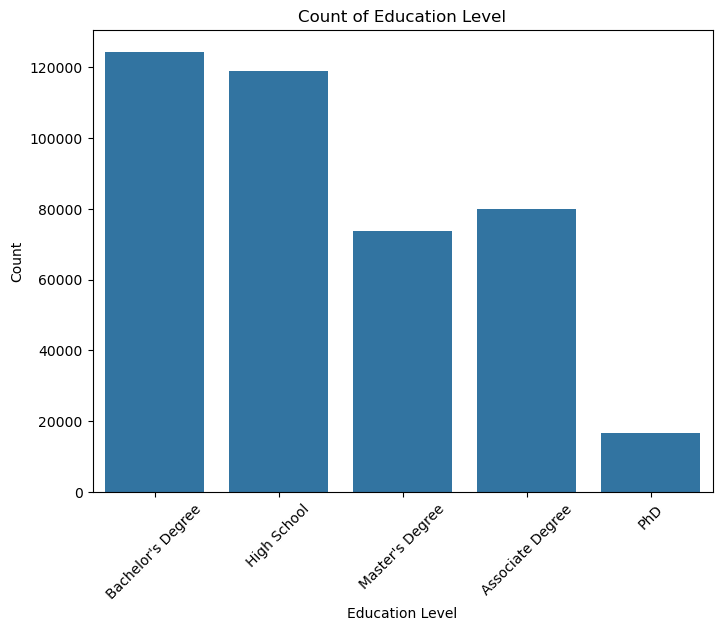

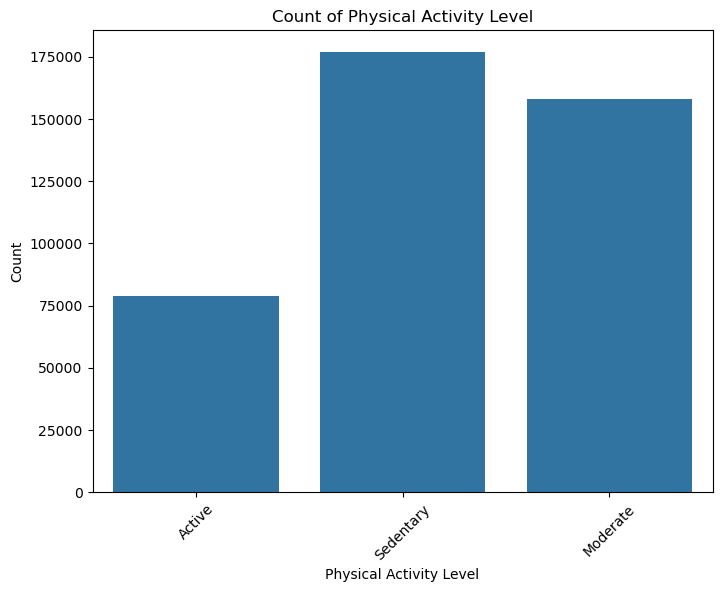

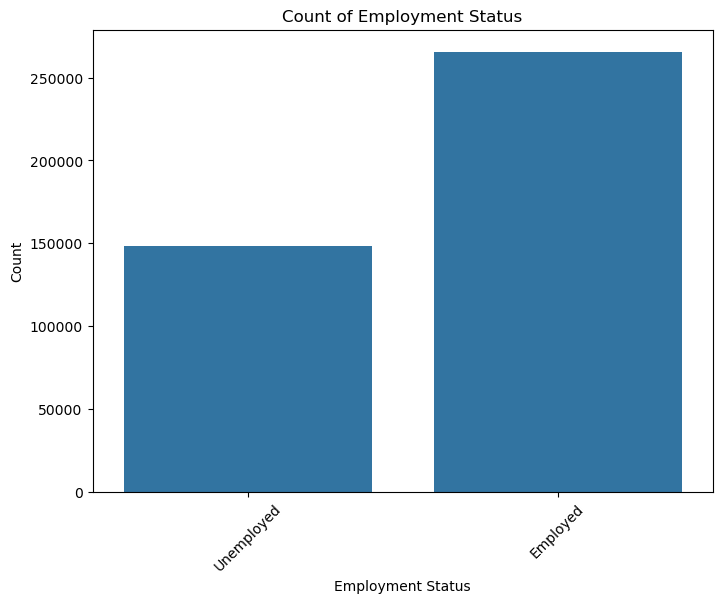

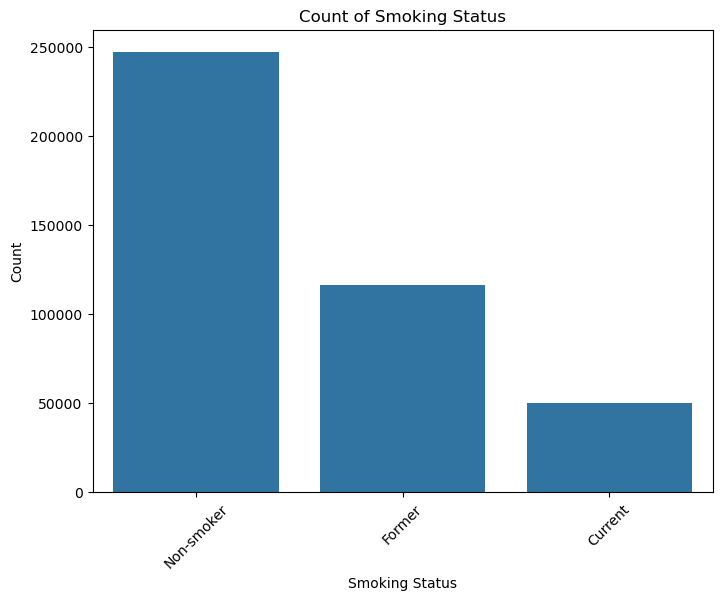

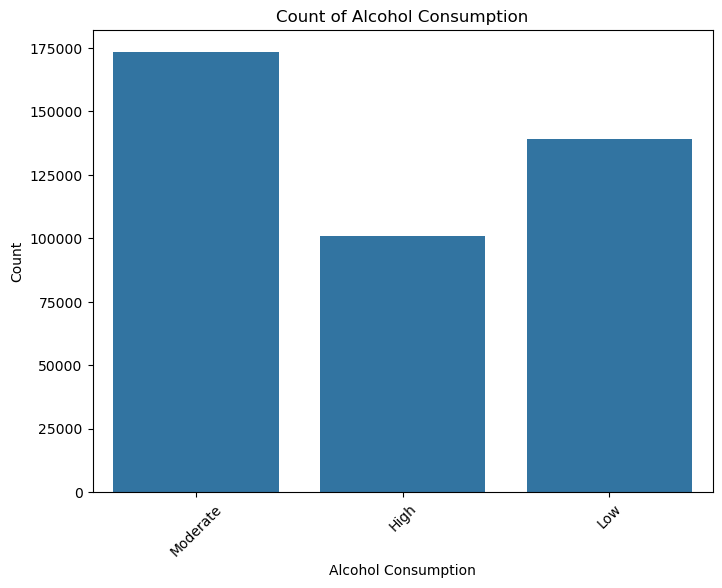

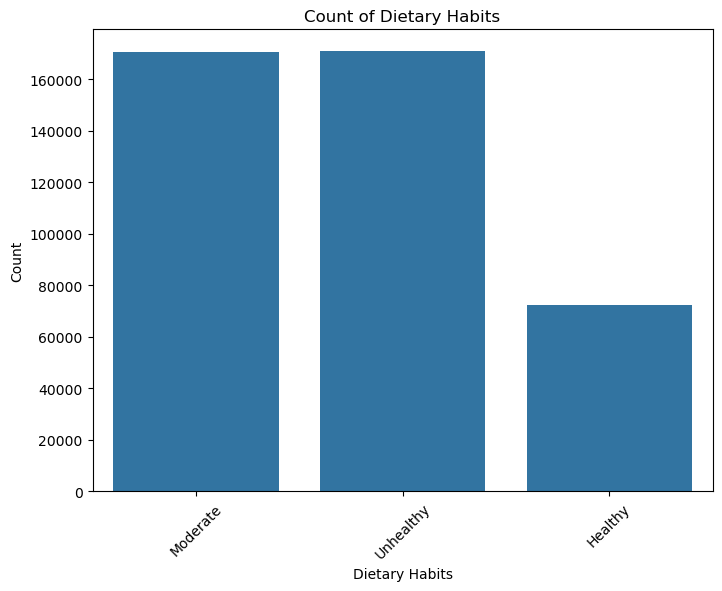

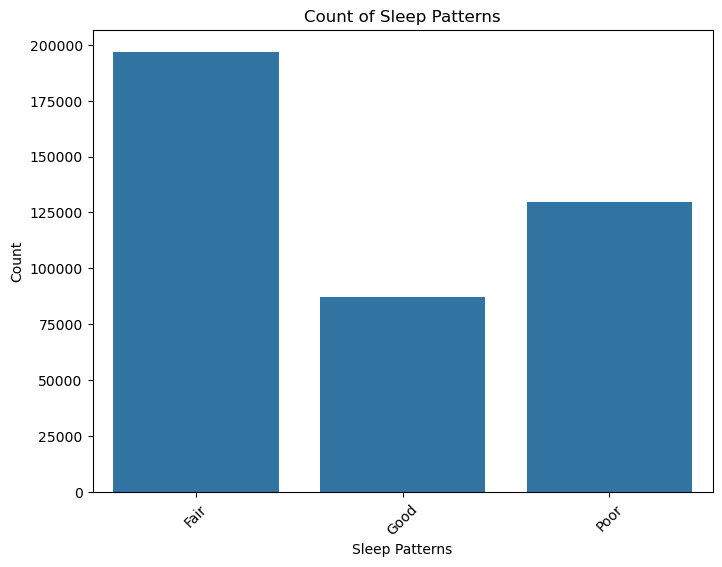

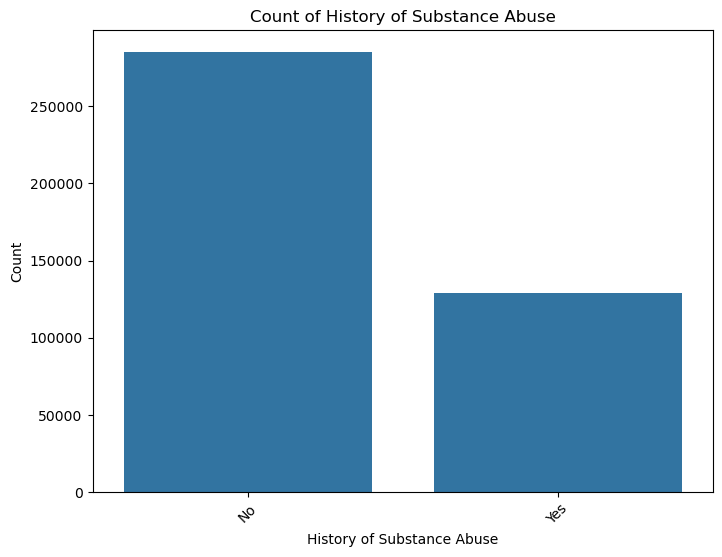

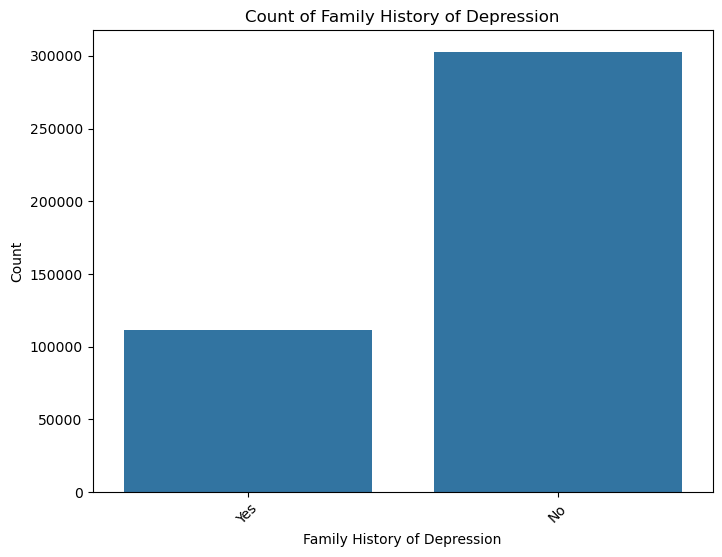

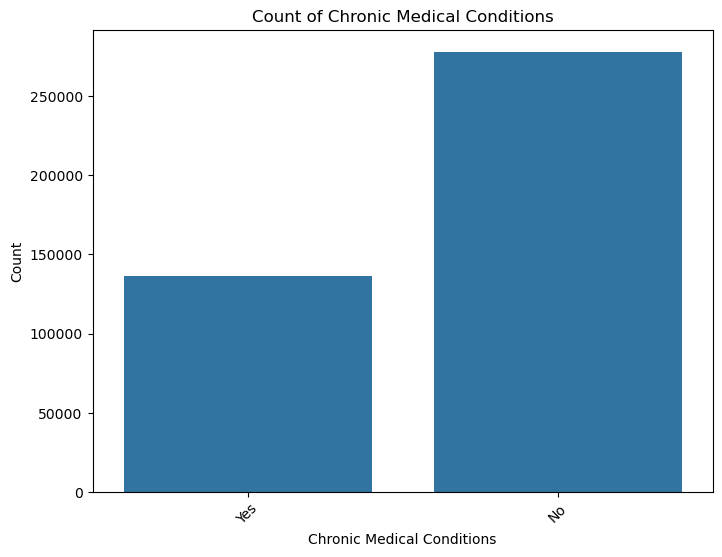

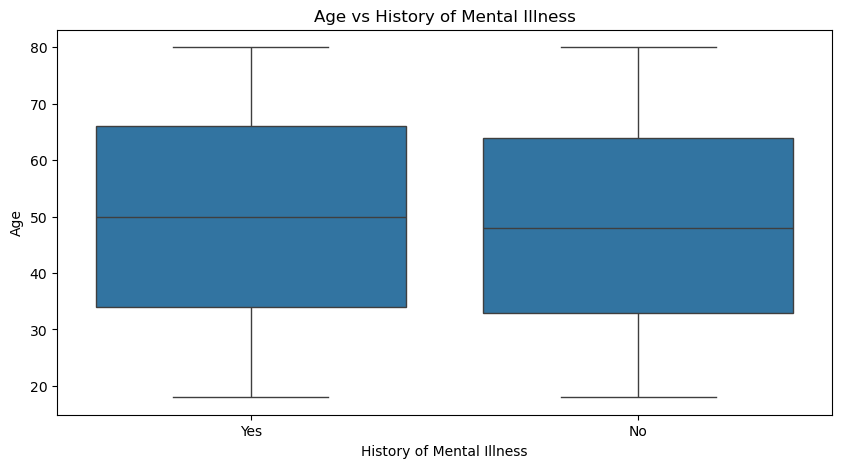

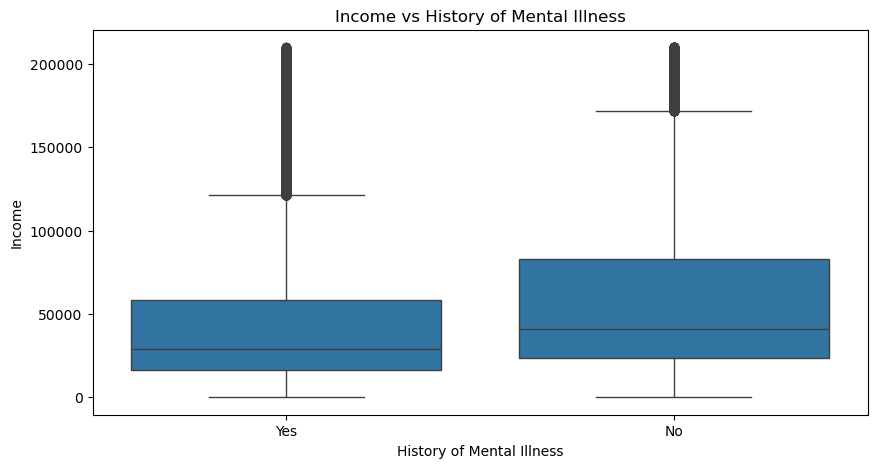

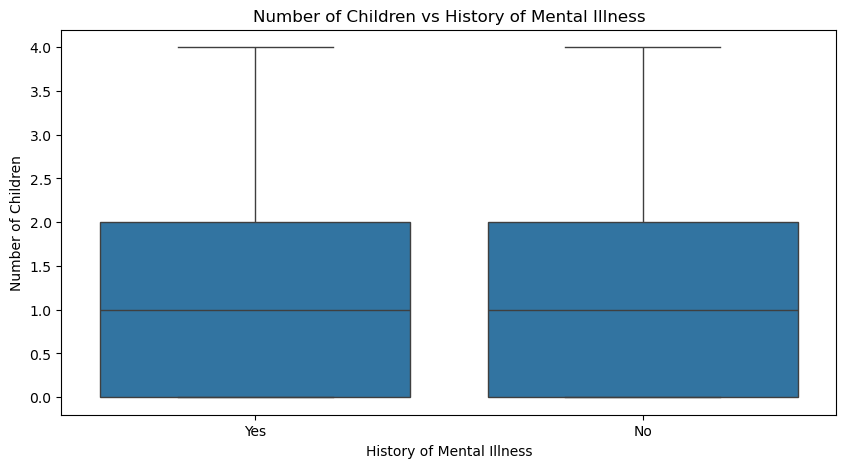

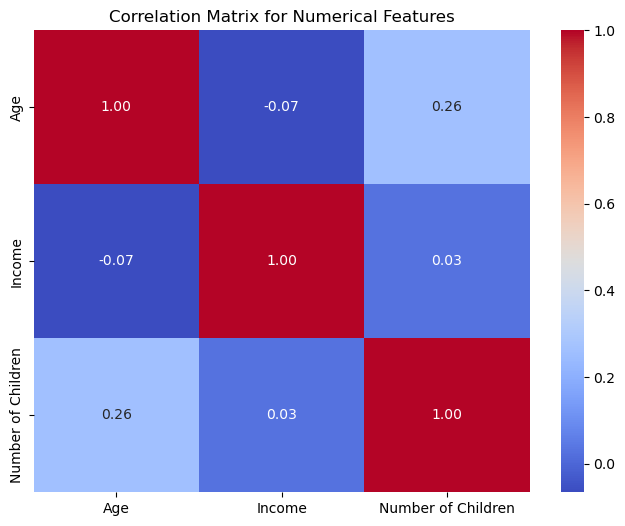

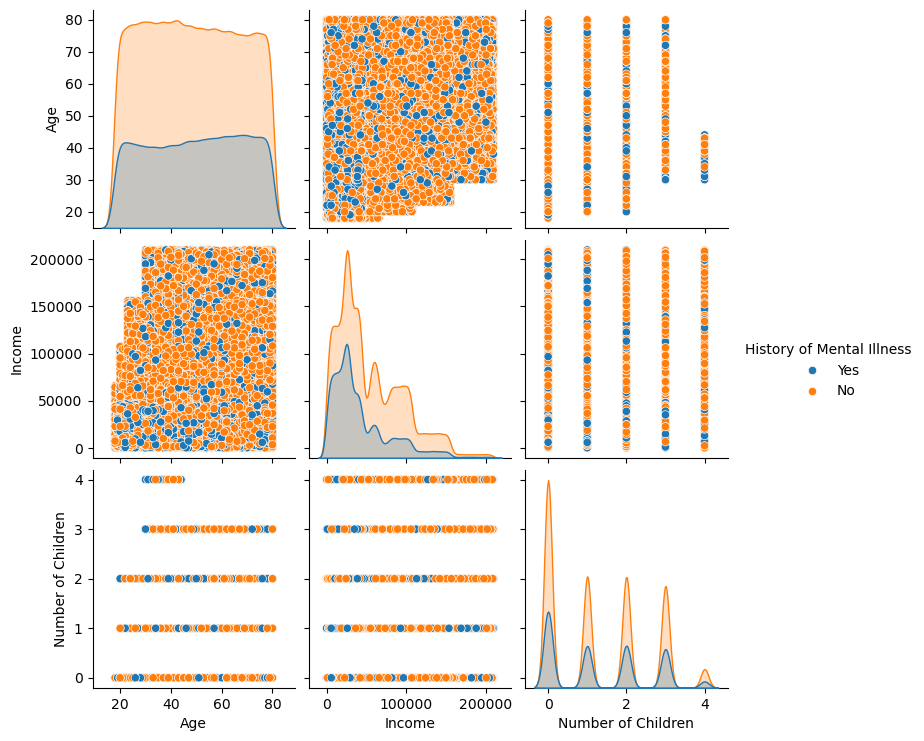

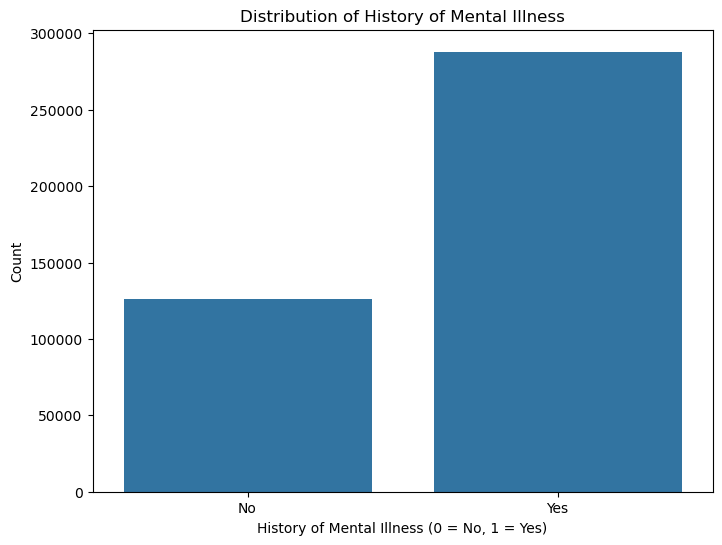

In [11]:
# Univariate Analysis

# Numerical Features - Histograms and Boxplots
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Categorical Features - Barplots
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df) # This function from Seaborn creates a bar plot to show the count of observations in each category for a categorical variable.
                                  #  x=col: The name of the column (categorical variable) to plot.
                                  #  data=df: The DataFrame containing the data.
    plt.title(f'Count of {col}') # Adds a title to the plot
    plt.xlabel(col) #  Label the x-axis
    plt.ylabel('Count') #  Label the y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed (helpful for long labels)
    plt.show()

# Bivariate Analysis
# Numerical vs Categorical
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['History of Mental Illness'], y=df[col])
    plt.title(f'{col} vs History of Mental Illness')
    plt.show()

# Correlation Matrix for Numerical Features
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# Multivariate Analysis
# Pairplot for Numerical Features (if dataset is small)
sns.pairplot(df[numerical_features + ['History of Mental Illness']], hue='History of Mental Illness', diag_kind='kde')
plt.show()
'''
##### Missing Values and Imputation - NOT NEEDED as there are NO missing values #####
# For numerical features
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# For categorical features
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])
'''
# Handling Class Imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='History of Mental Illness', data=df) # This function from seaborn creates a bar plot to show the count of observations for each class in the binary response variable.
plt.title('Distribution of History of Mental Illness') # Adds a title to the plot.
plt.xlabel('History of Mental Illness (0 = No, 1 = Yes)') # Adds a y label to the plot.
plt.ylabel('Count') # Adds a x label to the plot.
plt.xticks(ticks=[0, 1], labels=['No', 'Yes']) # Modifies the x-axis tick labels to display more readable class names ("Yes" and "No").
plt.show() # draw the plot

# If imbalanced, consider using techniques such class weights



# Test of how categorical feature relates to the binary target variable ("Yes" or "No")

The test is to use visualizations to explore potential correlations between categorical features and the binary response variable, providing insights for feature selection or further statistical analysis. Here are some useful techniques for this:

1. Stacked Bar Plot
A stacked bar plot can show how the categorical feature's distribution varies across the classes of the response variable. For example, you can visualize how the different levels of a categorical feature (e.g., "Marital Status") are associated with the response variable ("History of Mental Illness" which is binary).

2. Chi-Square Test of Independence
You can use statistical tests like the Chi-Square Test to assess the strength of the relationship between categorical variables and the response variable, though it is not a visualization technique. This can be followed by a bar plot to interpret results.

3. Countplot (Grouped by Response Variable)
This is one of the easiest ways to visualize the correlation between categorical variables and the binary response variable.

 # Explanation of Plots:

 - Stacked Bar Plot:
    - This shows the relative distribution of the response variable within each category of the categorical feature. If the bars are of unequal size across categories of the response, it suggests that the categorical variable may be related to the response.

 - Grouped Bar Plot:
    - This is similar to a stacked plot but groups the response categories next to each other for better comparison.

 - Chi-Square Test:
     - This statistical test checks for the independence of the categorical variables. A low p-value indicates that the feature is related to the response.

 - Pie Chart:
    - Helps to show the proportion of the response variable classes ("Yes" or "No") within each category of the categorical variable.

 # How to Interpret:
 - Visual Inspection:
    - If you see that some categories of a categorical feature have much higher counts in one class of the response variable, this indicates a possible relationship.
 - Statistical Significance:
    - If the p-value of the Chi-Square test is low (e.g., < 0.05), it indicates that the categorical variable has a statistically significant relationship with the binary response variable.

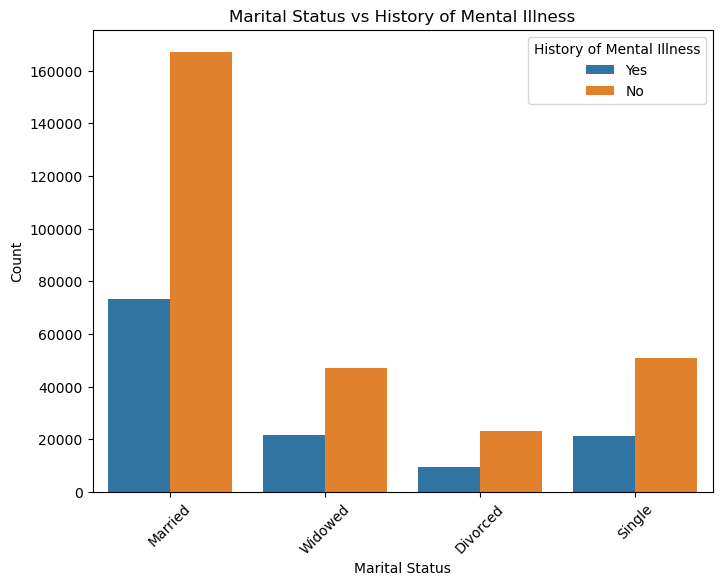

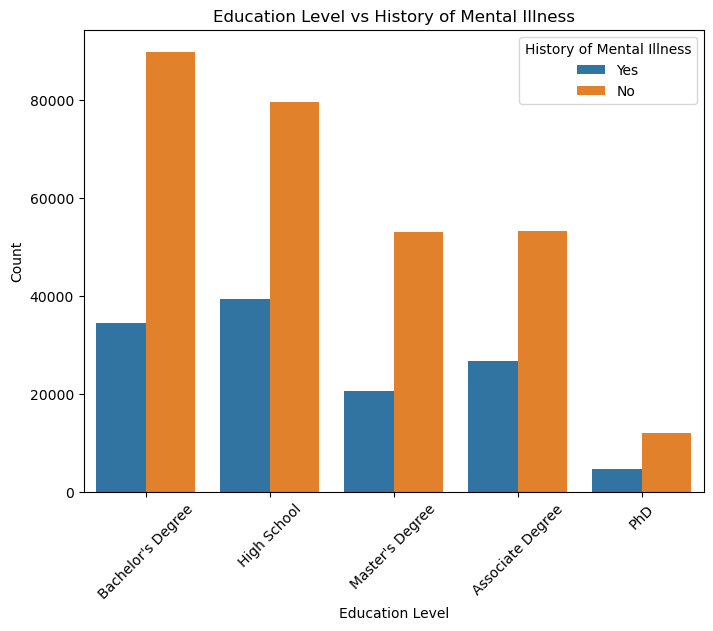

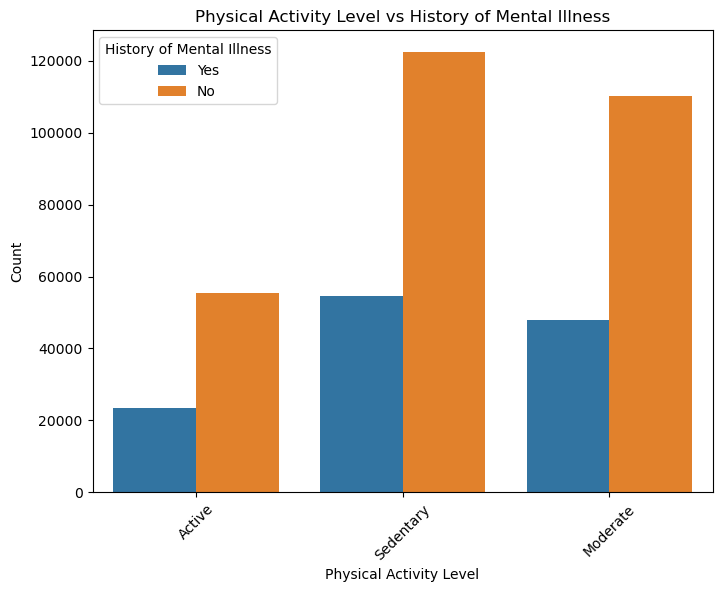

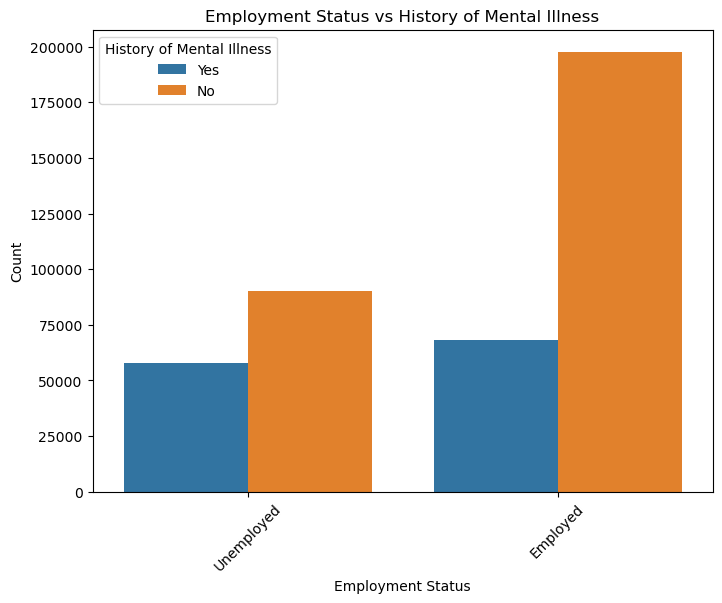

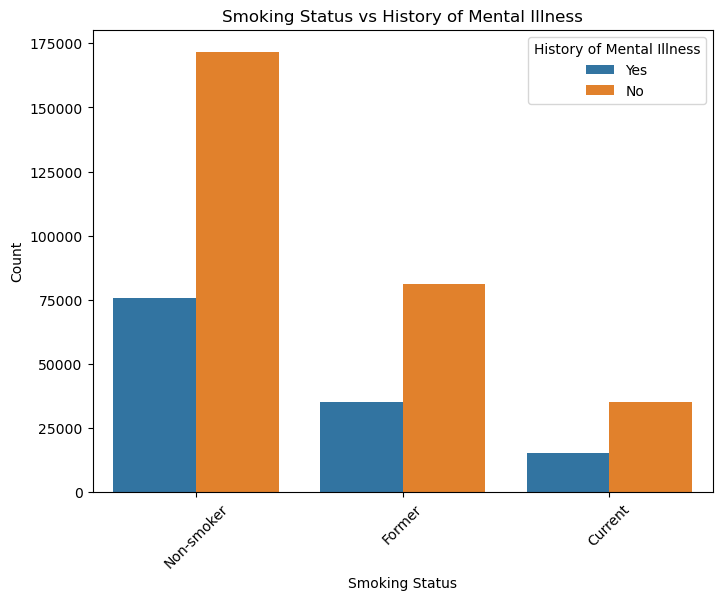

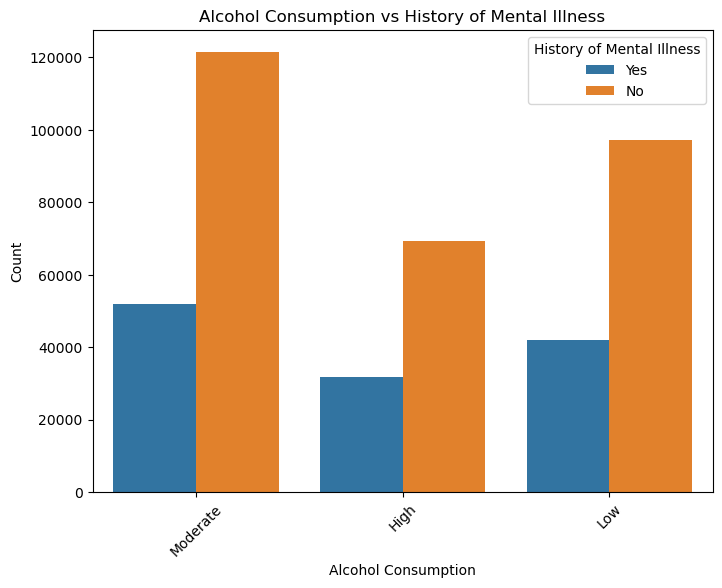

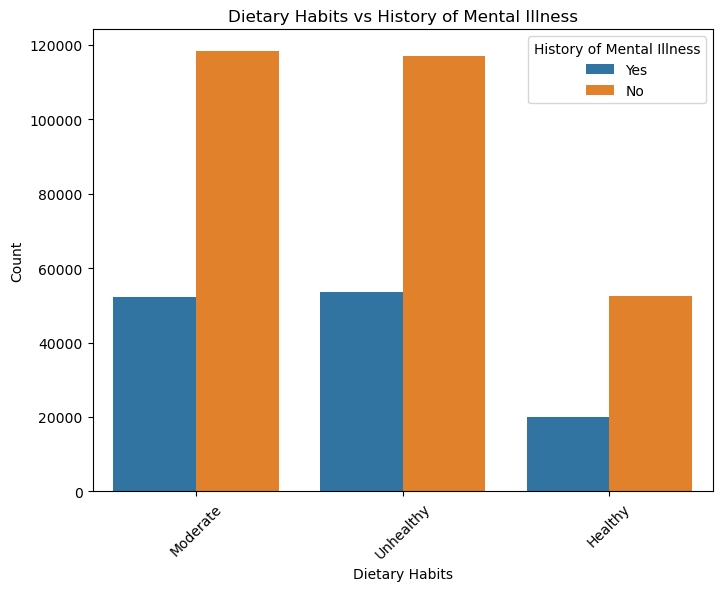

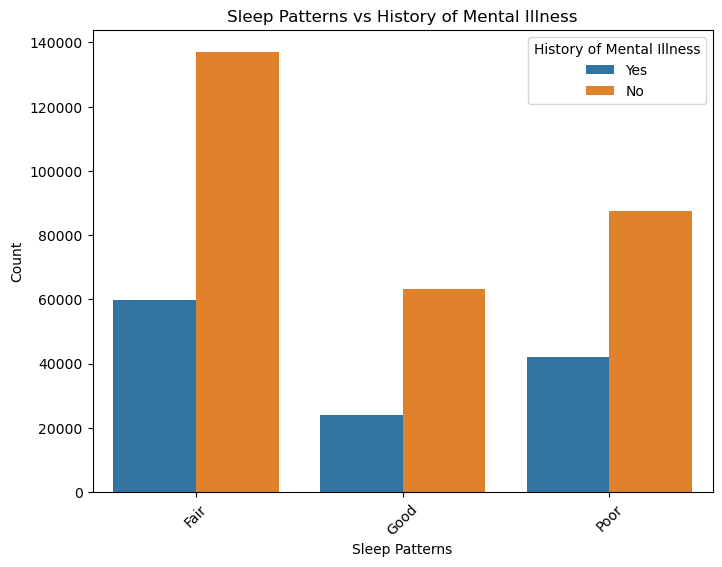

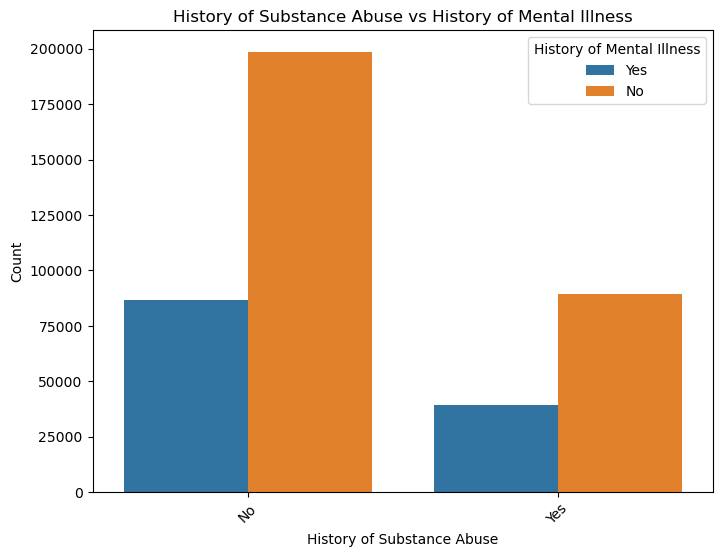

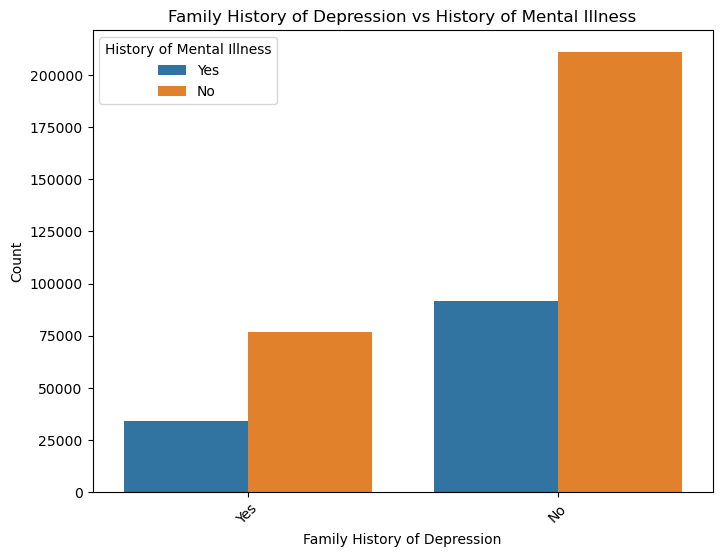

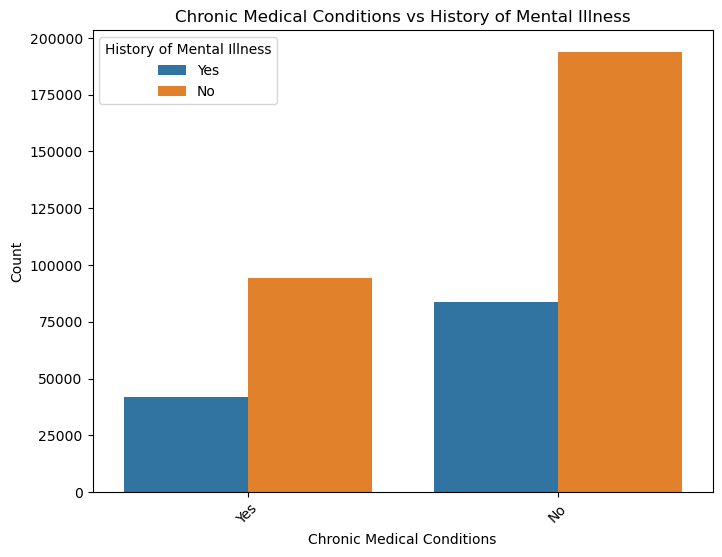

In [12]:
# Test of Variables
# Stacked bar Plot

# Plotting stacked bar plots for each categorical variable
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='History of Mental Illness', data=df)
    plt.title(f'{col} vs History of Mental Illness')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed (helpful for long labels)
    plt.show()


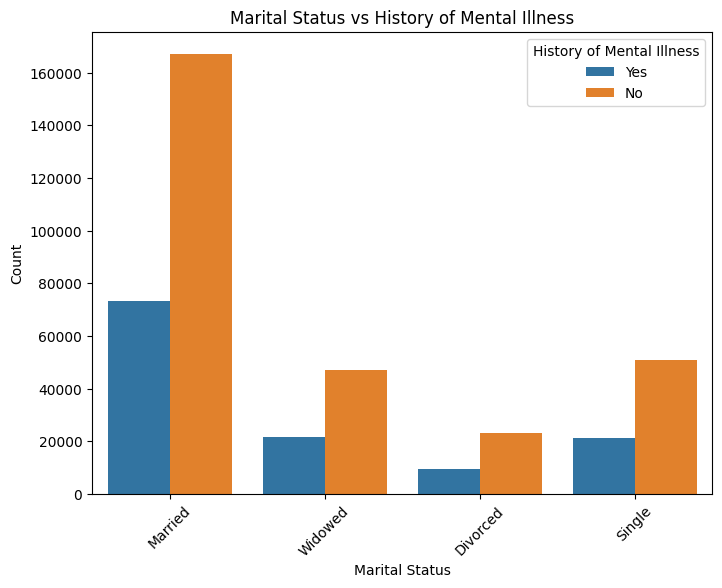

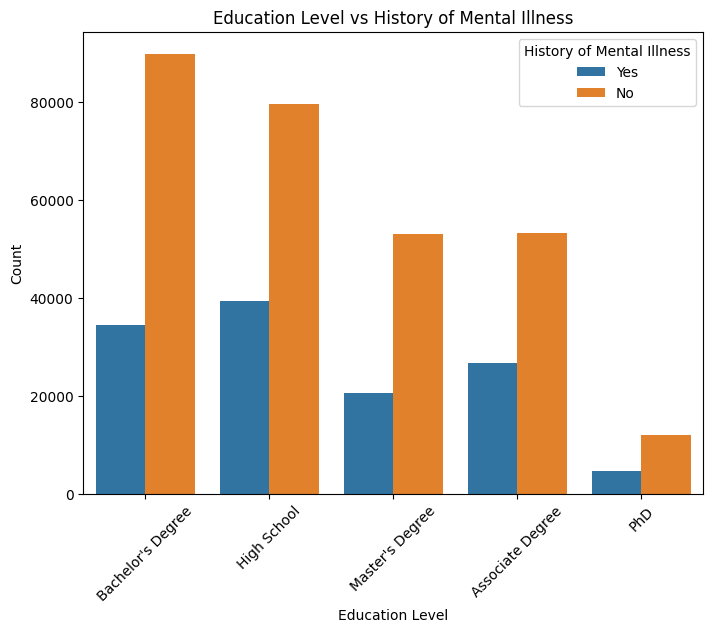

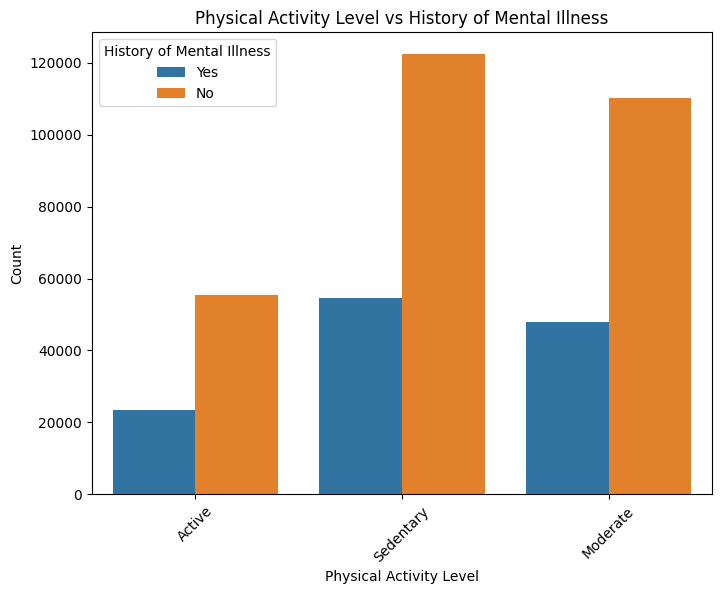

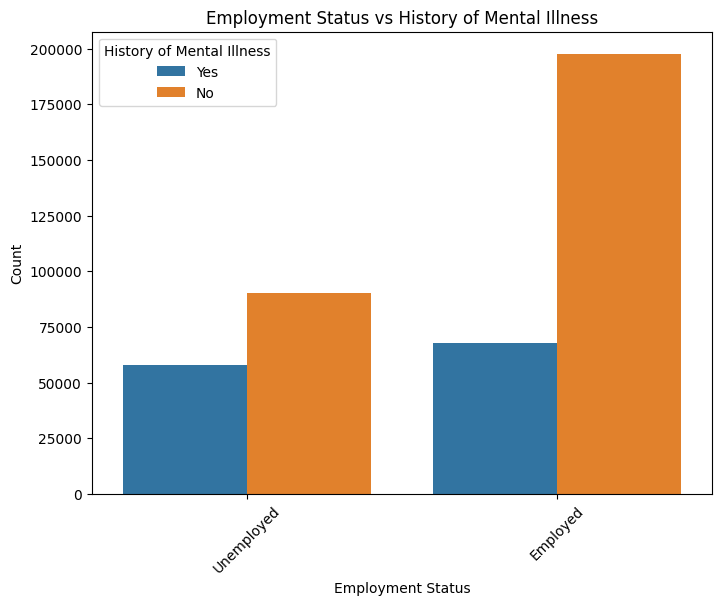

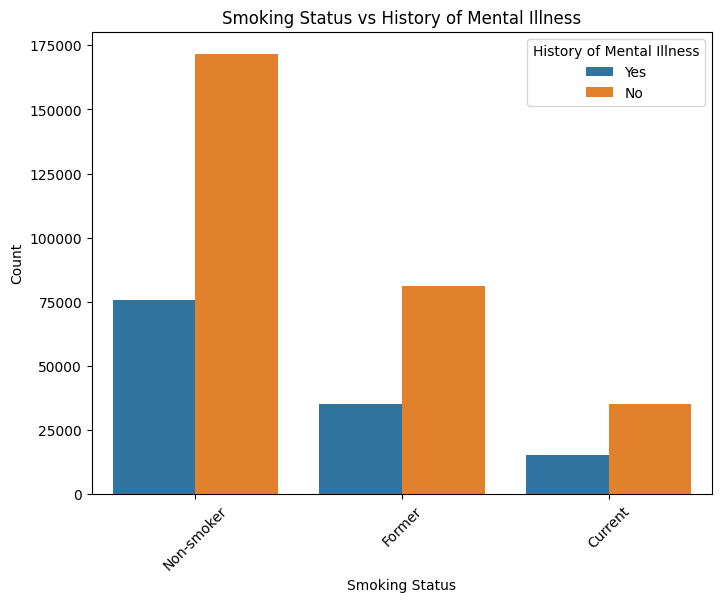

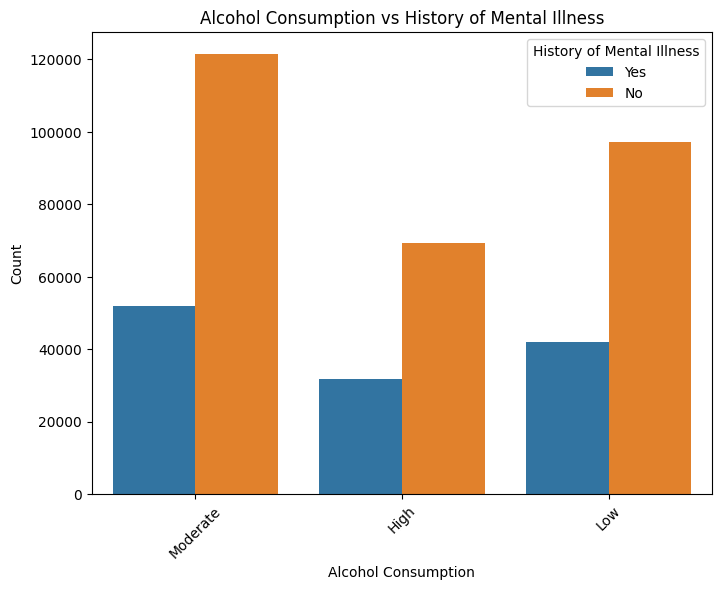

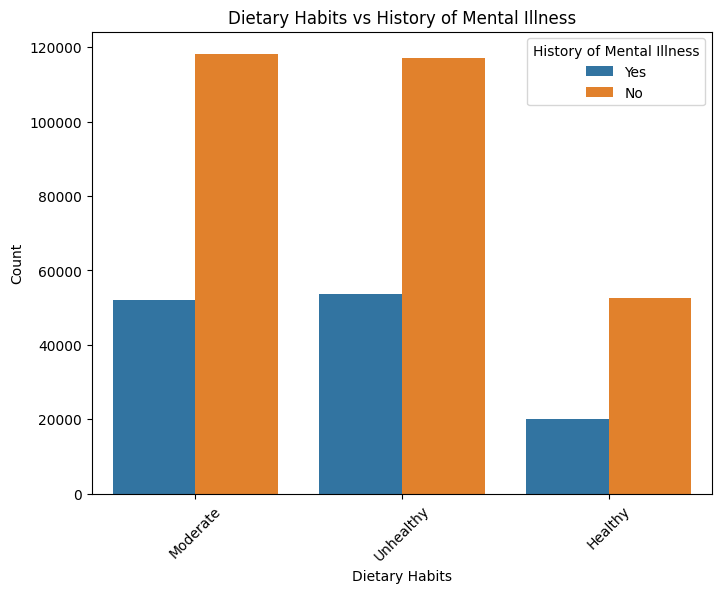

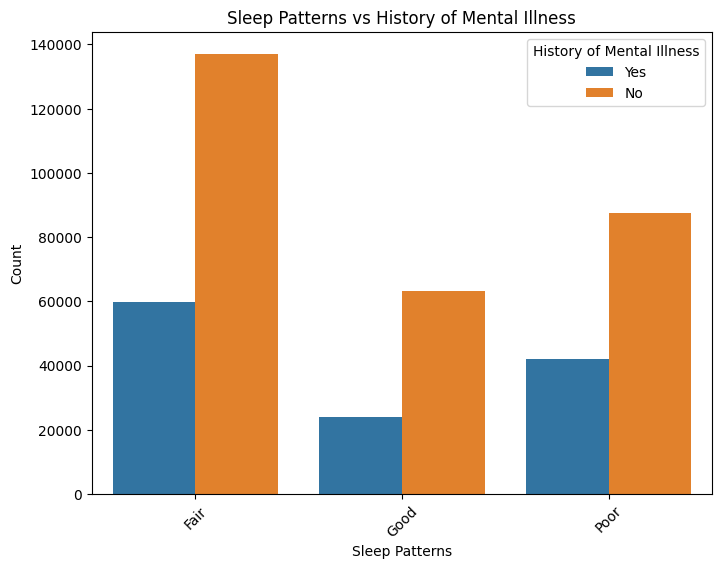

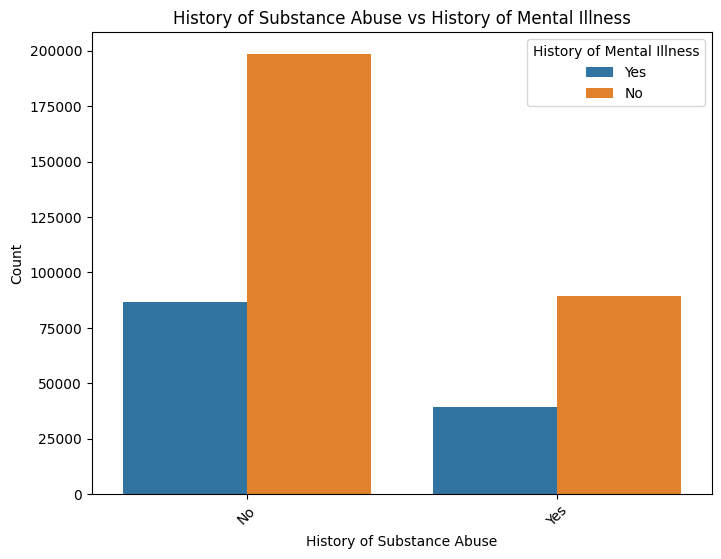

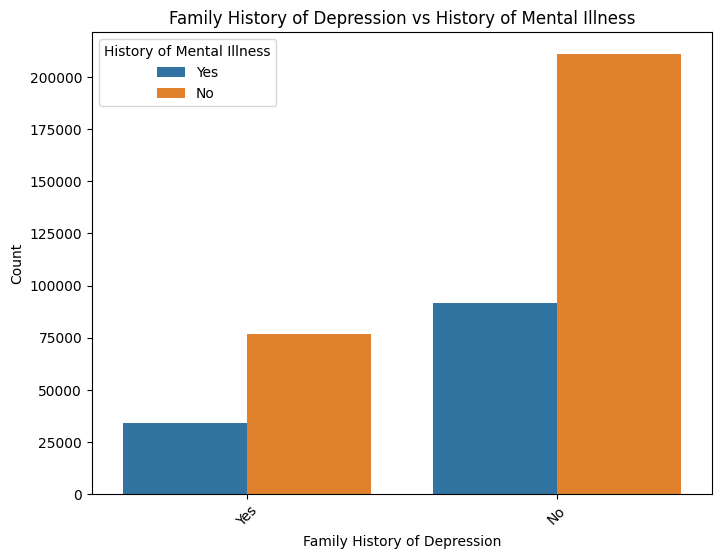

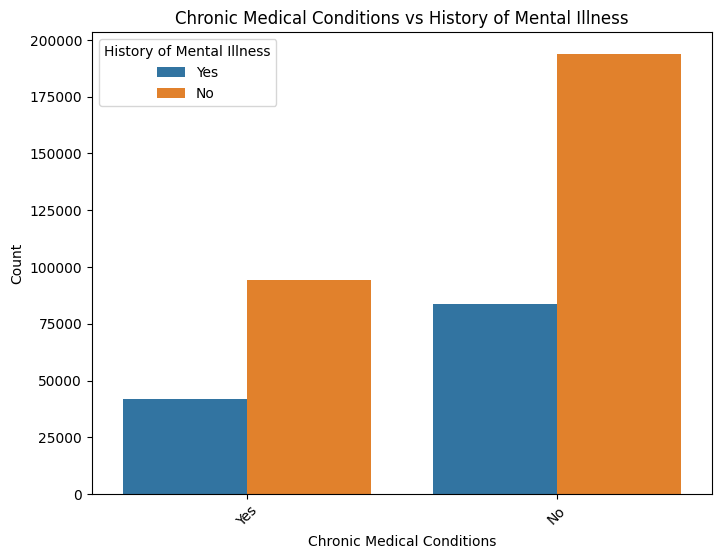

In [ ]:
# Grouped bar plot
# Grouped Bar Plot for Categorical Variable and Response Variable
# This is similar to the stacked bar plot, but it doesn't stack the bars — instead, it groups them side by side for each category.
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='History of Mental Illness', data=df, dodge=True)
    plt.title(f'{col} vs History of Mental Illness')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [13]:
# Chi-Square Test for Statistical Relationship - test for each categorical variable against the response
# Calculates the Chi-Square Test of Independence to check whether a categorical variable is significantly related to the response variable.
# Contingency Table: This table will show the counts of each category of the feature versus the response variable.
# Chi-Square Test: The p-value will tell you if there's a statistically significant relationship. A p-value < 0.05 generally indicates a significant relationship.

from scipy.stats import chi2_contingency

for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['History of Mental Illness'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Display the contingency table
    print(contingency_table)
    print(f'Chi-Square Test for {col}: p-value = {p}')
    if p < 0.05:
        print(f'{col} is significantly correlated with History of Mental Illness.\n')
    else:
        print(f'{col} is not significantly correlated with History of Mental Illness.\n')


History of Mental Illness      No    Yes
Marital Status                          
Divorced                    23111   9618
Married                    167155  73289
Single                      50690  21420
Widowed                     46987  21498
Chi-Square Test for Marital Status: p-value = 5.409031887961224e-14
Marital Status is significantly correlated with History of Mental Illness.

History of Mental Illness     No    Yes
Education Level                        
Associate Degree           53324  26675
Bachelor's Degree          89845  34484
High School                79583  39344
Master's Degree            53111  20657
PhD                        12080   4665
Chi-Square Test for Education Level: p-value = 5.678973600047682e-302
Education Level is significantly correlated with History of Mental Illness.

History of Mental Illness      No    Yes
Physical Activity Level                 
Active                      55424  23481
Moderate                   110157  47856
Sedentary          

<Figure size 800x600 with 0 Axes>

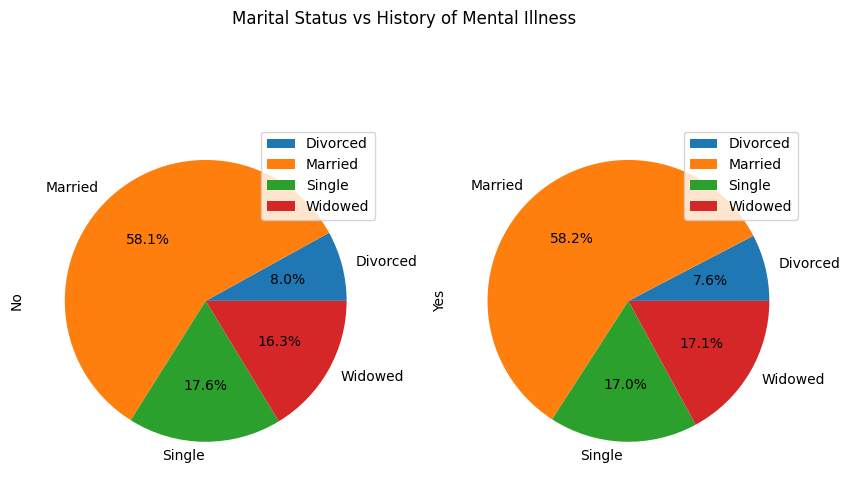

<Figure size 800x600 with 0 Axes>

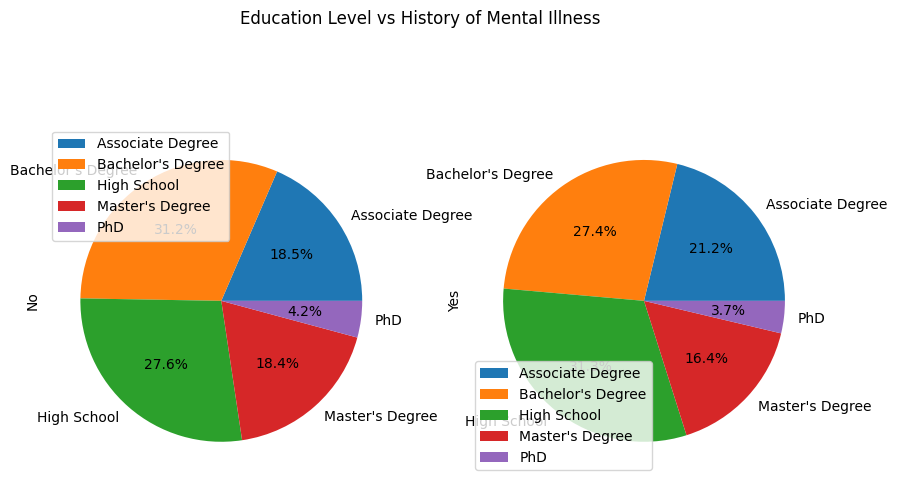

<Figure size 800x600 with 0 Axes>

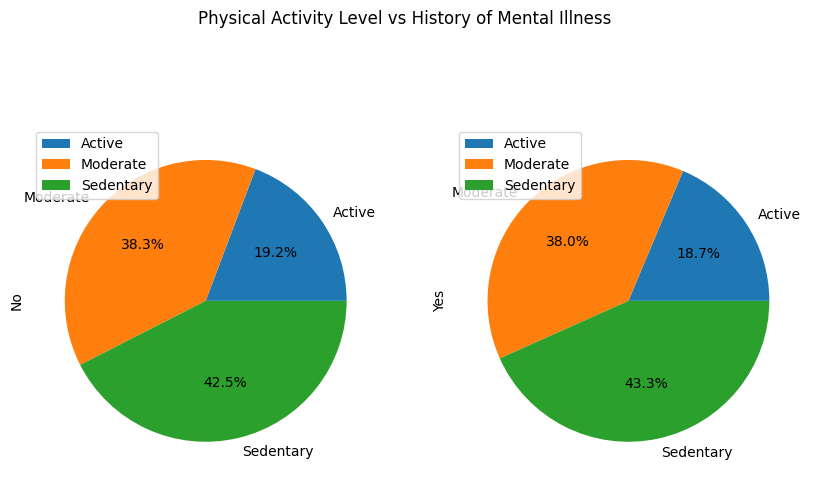

<Figure size 800x600 with 0 Axes>

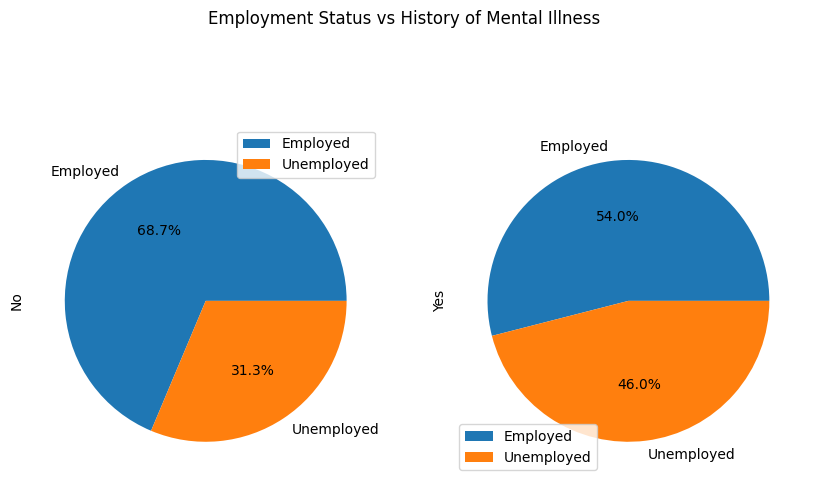

<Figure size 800x600 with 0 Axes>

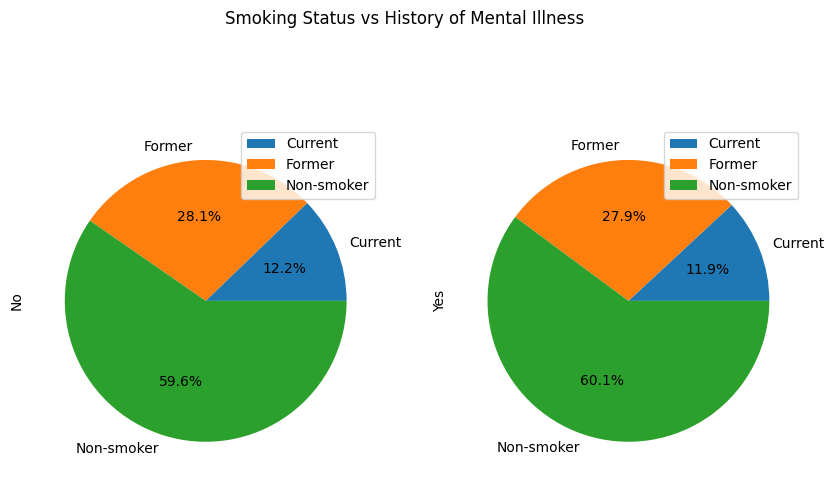

<Figure size 800x600 with 0 Axes>

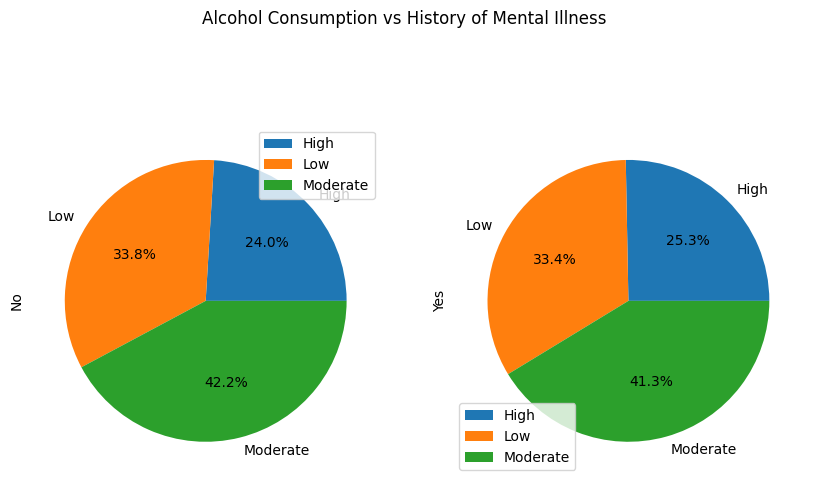

<Figure size 800x600 with 0 Axes>

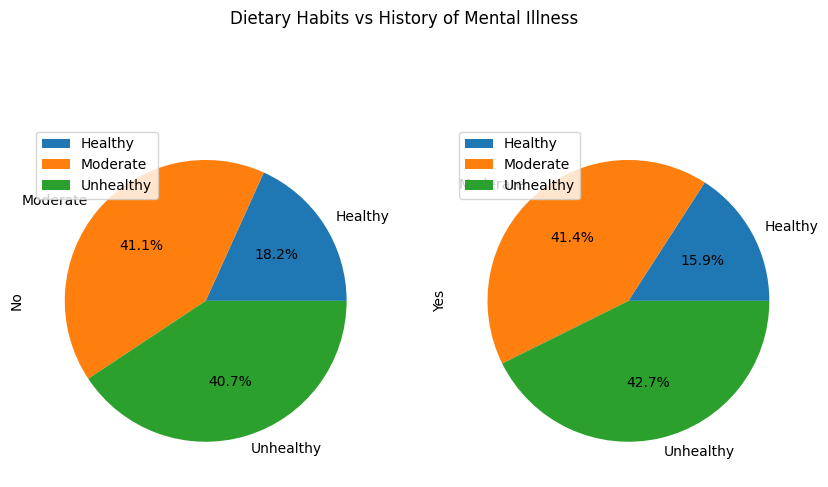

<Figure size 800x600 with 0 Axes>

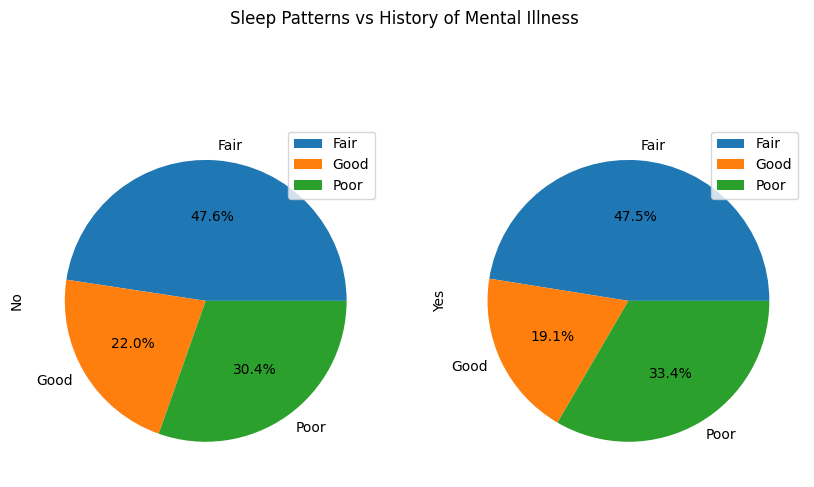

<Figure size 800x600 with 0 Axes>

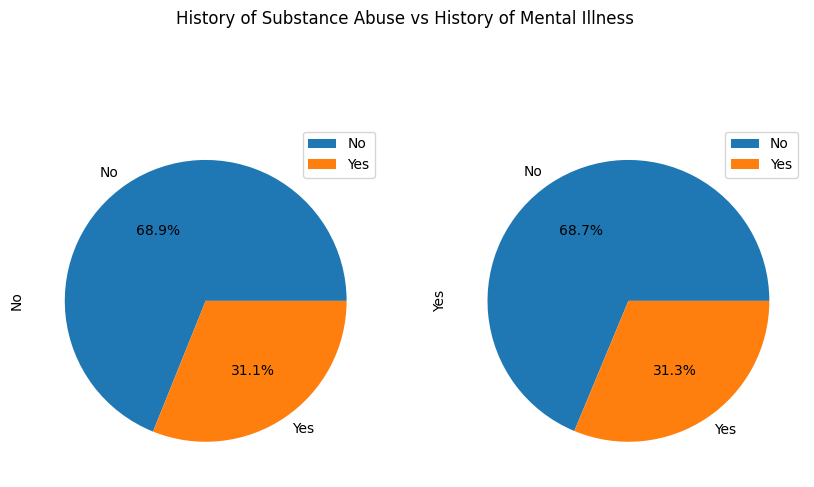

<Figure size 800x600 with 0 Axes>

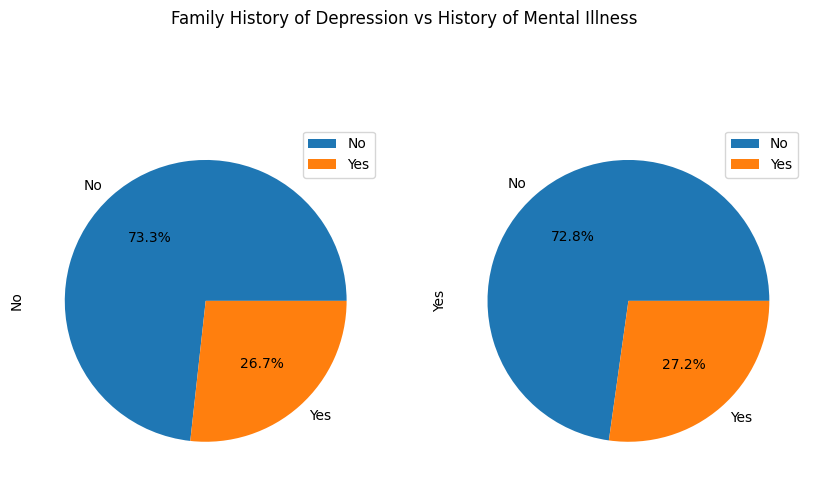

<Figure size 800x600 with 0 Axes>

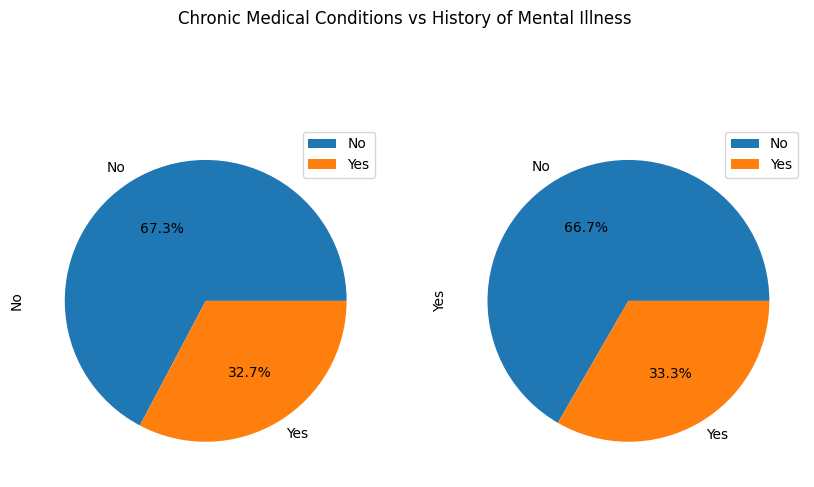

In [ ]:
# Pie charts for each categorical feature
# Helpful to understand how the categories of each feature split between the "Yes" and "No" classes of the binary response.
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    # Create a grouped data frame based on the target variable
    df_grouped = df.groupby([col, 'History of Mental Illness']).size().unstack().fillna(0)
    df_grouped.plot(kind='pie', subplots=True, figsize=(10, 6), autopct='%1.1f%%', legend=True, title=f'{col} vs History of Mental Illness')
    plt.show()


# RandomForestClassifier Pipeline
A pipeline in machine learning refers to a sequence of steps that are executed in a particular order. Each step in the pipeline performs a specific function such as preprocessing, feature engineering, and model training. By using a pipeline, we can automate the workflow, making it easier to manage, improve reproducibility, and avoid data leakage.

 - In the context of a RandomForestClassifier, a pipeline typically combines:
Preprocessing (e.g., scaling, encoding categorical variables, handling missing values), Model training (e.g., Random Forest classifier).

- Using a pipeline ensures that transformations like scaling or encoding are applied consistently both during model training and evaluation,
and that we don't inadvertently use data leakage (e.g., scaling using the entire dataset before splitting into training and testing).

 # Key Components in the Pipeline:
 - Preprocessing: Data transformations like handling missing values, scaling, and encoding.
 - RandomForestClassifier: The machine learning model that is being trained.

 # Parameters in RandomForestClassifier

random_state:

 - Definition:
This is the seed used by the random number generator in the RandomForestClassifier. It ensures reproducibility of results when splitting the data and creating random decision trees within the forest.

 - Purpose:
By setting a specific random_state value (e.g., random_state=42), the randomness in the algorithm (such as the random splitting of data or feature selection) can be controlled, ensuring that every time we run the code with the same data and model configuration, we get the same result.

 - Usage: Typically set to an integer for reproducibility.
If we set random_state=None, the randomness will vary each time we run the model, making results less reproducible.

n_estimators:
 - Definition: The number of trees in the forest. This parameter determines how many decision trees will be trained in the random forest.
 - Purpose: More trees usually result in a more robust model, but beyond a certain point, additional trees offer diminishing returns in terms of model accuracy. The trade-off is between computation time and model accuracy.

 - Usage: Typically, a value like 100 or 200 is used, but this can be adjusted based on the dataset size and desired accuracy.

 # Effect of n_estimators:
More trees generally lead to better performance, as the model has more individual decision trees to aggregate their predictions. However, using too many trees can increase computation time and memory usage without providing substantial improvements in performance.

# Summary of Parameters:
 - random_state: Controls the randomness of the data splits and tree construction, ensuring reproducibility. It is set to a fixed integer for consistency across multiple runs.
- n_estimators: Specifies the number of decision trees in the random forest. A higher number generally improves model performance but increases computational cost.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Age                           413768 non-null  int64 
 1   Marital Status                413768 non-null  object
 2   Education Level               413768 non-null  object
 3   Number of Children            413768 non-null  int64 
 4   Smoking Status                413768 non-null  object
 5   Physical Activity Level       413768 non-null  object
 6   Employment Status             413768 non-null  object
 7   Income                        413768 non-null  int32 
 8   Alcohol Consumption           413768 non-null  object
 9   Dietary Habits                413768 non-null  object
 10  Sleep Patterns                413768 non-null  object
 11  History of Mental Illness     413768 non-null  object
 12  History of Substance Abuse    413768 non-null  object
 13 

In [15]:
# Define correlated features and response variables
# not siginificant variables)
df = df.drop(['Age', 'Number of Children', 'Income'], axis=1)
X = df[["Marital Status", "Education Level", "Smoking Status", "Physical Activity Level",
       "Employment Status", "Alcohol Consumption", "Dietary Habits","Sleep Patterns",
       "History of Substance Abuse", "Family History of Depression","Chronic Medical Conditions"]]
y = df["History of Mental Illness"].apply(lambda x: 1 if x == "Yes" else 0)  # Binary encoding of response variable

In [16]:
# Preprocessing on selected variables
# - Numerical variables: Scaling
# - Categorical variables: One-hot encoding
#numerical_columns = ['Age', 'Income', 'Number of Children']
categorical_columns = ['Marital Status','Education Level', 'Physical Activity Level', 'Employment Status','Smoking Status', 'Alcohol Consumption',
       'Dietary Habits','Sleep Patterns', 'History of Substance Abuse', 'Family History of Depression','Chronic Medical Conditions']

preprocessor = ColumnTransformer(
    transformers=[
        #("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(), categorical_columns)

    ]
)

In [17]:
model = RandomForestClassifier(random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Marital Status',
                                                   'Education Level',
                                                   'Physical Activity Level',
                                                   'Employment Status',
                                                   'Smoking Status',
                                                   'Alcohol Consumption',
                                                   'Dietary Habits',
                                                   'Sleep Patterns',
                                                   'History of Substance Abuse',
                                                   'Family History of '
                                                   'Depression',
                                                   'Chronic Medical '
                                                   'Conditions'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [18]:
# Make predictions
y_pred = pipeline.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [21]:
# convert data into dataframe
y_pred = pd.DataFrame(y_pred)
# save predicted values to csv for sharing
y_pred.to_csv('prediction.csv')

# Model Evaluation
A Confusion Matrix is a tool used to evaluate the performance of a classification model. It provides a summary of the model's predictions compared to the actual values. The matrix is especially useful for understanding how well a model is performing in terms of correctly and incorrectly predicting the classes of a dataset.

 # Structure of a Confusion Matrix
For a binary classification problem, the confusion matrix typically looks like this:

Predicted Positive (1)	Predicted Negative (0)
Actual Positive (1)	True Positive (TP)	False Negative (FN)
Actual Negative (0)	False Positive (FP)	True Negative (TN)
Where:

True Positive (TP): The number of instances correctly predicted as positive.
True Negative (TN): The number of instances correctly predicted as negative.
False Positive (FP): The number of instances incorrectly predicted as positive (also called a Type I error).
False Negative (FN): The number of instances incorrectly predicted as negative (also called a Type II error).

 # What Does the Confusion Matrix Tell Us?

 - Accuracy:
    - Measures the overall correctness of the model. Accuracy tells you the proportion of correct predictions (both positive and negative) out of the total predictions.

 - Precision (Positive Predictive Value):
    - Precision tells us how many of the predicted positive instances are actually positive. Precision is important when the cost of false positives is high. For example, in spam detection, you want to make sure that emails marked as spam are truly spam.

 - Recall (Sensitivity, True Positive Rate):
    - Recall tells us how many of the actual positive instances are correctly identified by the model. Recall is crucial when the cost of false negatives is high. For example, in medical diagnostics, we want to catch as many positive cases (e.g., patients with a disease) as possible.

 - F1-Score:
    - The F1-score is the harmonic mean of precision and recall, providing a balance between them. The F1-score is useful when you need a balance between precision and recall, especially in cases of imbalanced datasets where one class might be much more frequent than the other.

 - Specificity (True Negative Rate):
    - pecificity measures how many of the actual negative instances are correctly identified as negative. Specificity is useful when we need to minimize false positives.

 - False Positive Rate (FPR):
    - FPR tells us how often the model incorrectly predicts negative instances as positive. FPR is often used in ROC curve analysis and helps to evaluate the trade-off between the true positive rate and false positive rate.

 # Conclusion:
The confusion matrix is a powerful tool that helps to evaluate the performance of a classification model. It provides a breakdown of the model's predictions, showing how many predictions were correct and how many were incorrect,
and it can be used to calculate several important evaluation metrics like accuracy, precision, recall, and F1-score. This information is crucial for understanding where the model is succeeding and where it may need improvement.


In [22]:
# # Model Evaluation/Assessment
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[53095  4376]
 [22847  2436]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.80     57471
           1       0.36      0.10      0.15     25283

    accuracy                           0.67     82754
   macro avg       0.53      0.51      0.47     82754
weighted avg       0.59      0.67      0.60     82754



In [23]:
# Fine-Tune the Model
# Using hyperparameter tuning to improve model performance.
# Hyperparameter grid - higher grid paramater means cost and increased computing time
# Atleast 15 minutes is required to run with the below settings
from datetime import datetime # to measure run time
start_time = datetime.now()

from sklearn.model_selection import GridSearchCV
param_grid = {
   # 'model__n_estimators': [50, 100, 200],
   # 'model__max_depth': [None, 10, 20],
   # 'model__min_samples_split': [2, 5, 10]

    'model__n_estimators': [5, 20, 40],
    'model__max_depth': [None, 2, 10],
    'model__min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
total_elapsed_time = (datetime.now() - start_time)
print("Done in {} seconds".format(total_elapsed_time))

Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 40}
Done in 0:25:36.102772 seconds


In [26]:
# Saving the model
import pickle

# Save the model to a file
#with open('AXA_Exercise/test/Predict_Mental_health_model.pkl', 'wb') as file:
with open('Predict_Mental_health_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Load the model from the file
# with open('Predict_Mental_health_model.pkl', 'rb') as file:
#    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
# new_predictions = loaded_model.predict(X_test)


In [27]:
# Feature Importance
# Analyze the importance of each feature in the final model.

# Extract feature names after preprocessing
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
importances = best_model.named_steps['model'].feature_importances_

# Display feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))


                                   Feature  Importance
12         cat__Employment Status_Employed    0.311543
13       cat__Employment Status_Unemployed    0.253597
6         cat__Education Level_High School    0.043210
14             cat__Smoking Status_Current    0.042381
5   cat__Education Level_Bachelor's Degree    0.033411
4    cat__Education Level_Associate Degree    0.031584
7     cat__Education Level_Master's Degree    0.022362
20             cat__Dietary Habits_Healthy    0.016621
16          cat__Smoking Status_Non-smoker    0.015357
24                cat__Sleep Patterns_Good    0.013141
15              cat__Smoking Status_Former    0.012345
11  cat__Physical Activity Level_Sedentary    0.012005
25                cat__Sleep Patterns_Poor    0.011931
22           cat__Dietary Habits_Unhealthy    0.011368
27     cat__History of Substance Abuse_Yes    0.010497
17           cat__Alcohol Consumption_High    0.010469
1              cat__Marital Status_Married    0.010050
30      ca

# Assessement of Model Bias
If we detect bias in the model's predictions, we can apply several techniques to mitigate it:

 - Resampling: Use techniques like SMOTE (for oversampling the minority class) or undersampling the majority class.
 - Reweighting: Assign weights to the classes based on their importance or balance, often used in conjunction with class_weight='balanced' in models like RandomForestClassifier.
- Fairness Constraints: Implement fairness constraints directly into the model (using AIF360 or other libraries).

In Summary
To evaluate the potential bias in a Random Forest Classifier model predicting 'History of Mental Illness' based on the given features, we should:

- Check for class imbalance in the response variable.
- Assess feature importance to identify if any sensitive features disproportionately influence the model’s decision-making.
- Evaluate model performance across different demographic groups (e.g., Age, Smoking Status).
- Examine error rates (False Positive and False Negative rates) across groups.
- Use fairness metrics to assess whether the model is exhibiting any bias or unfairness.

If we identify bias, we can apply bias mitigation techniques like sampling, reweighting, or fairness-aware learning algorithms to improve model fairness.

In [28]:
# Check for Class Imbalance in the Response Variable
import pandas as pd

# Assuming 'df' is the DataFrame with your data
print(df['History of Mental Illness'].value_counts())


History of Mental Illness
No     287943
Yes    125825
Name: count, dtype: int64


If we find that the target variable is heavily imbalanced, we may want to apply techniques such as resampling (e.g., oversampling the minority class with SMOTE or undersampling the majority class) or use the class_weight='balanced' parameter in the RandomForestClassifier.

from sklearn.ensemble import RandomForestClassifier

 - Solution: Create and train the RandomForestClassifier with class balancing

model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

model.fit(X_train, y_train)


In [29]:
# Assess Model for Error Distribution
#
# Disproportionate errors: If we find that the FPR or FNR is disproportionately high for certain groups
# (e.g., smokers or individuals with chronic medical conditions), the model may be exhibiting biased behavior.
# In that case, we might want to consider techniques like reweighting or oversampling to mitigate the bias.
#
# False positive rate (FPR) and false negative rate (FNR)
from sklearn.metrics import confusion_matrix

#cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
TP, FN, FP, TN = cm.ravel()

# Calculate FPR and FNR
FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate

print(f"False Positive Rate: {FPR}")
print(f"False Negative Rate: {FNR}")




False Positive Rate: 0.9036506743661749
False Negative Rate: 0.07614275025665118


# Class weighting of imbalanced response variable
Class weighting is an important technique for dealing with imbalanced response variables in classification tasks. When the dataset has a class imbalance, meaning one class is much more frequent than the other, the model may become biased towards predicting the majority class. Class weighting helps mitigate this bias by assigning higher importance to the minority class, allowing the model to pay more attention to it during training.

In the context of a Random Forest Classifier in scikit-learn, you can apply class weights using the class_weight parameter. The class_weight parameter can either be set to 'balanced', which automatically adjusts weights inversely proportional to the class frequencies, or we can manually set custom weights for each class.

# Automatic Class Weights (class_weight='balanced')
This approach automatically computes the class weights based on the inverse of the class frequencies. This is a good option when we're unsure about how much weight to assign to each class.

Explanation:
class_weight='balanced': This option automatically adjusts the weights based on the frequencies of the target classes. For example, if the class "Yes" (indicating history of mental illness) is much less frequent than "No", the model will give more importance to the "Yes" class.

In [30]:
# Apply Class Weighting - imbalanced response variable
# If the evaluation of the model is similar or not significntly changed after applying the class weighting,
# it means, as per the assumption, the classifier has taken this into consideration already.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assume 'df' is the DataFrame with features X and target variable y
X = df.drop(columns=['History of Mental Illness'])  # Features
y = df['History of Mental Illness']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier with automatic class weighting
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(class_weight= 'balanced', random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)

# Display confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




[[34606 22865]
 [12804 12479]]
              precision    recall  f1-score   support

          No       0.73      0.60      0.66     57471
         Yes       0.35      0.49      0.41     25283

    accuracy                           0.57     82754
   macro avg       0.54      0.55      0.54     82754
weighted avg       0.61      0.57      0.58     82754



# Limitations and Performance Improving methods

Random Forest Classifier is a versatile, powerful model, and widely-used machine learning model, it has certain limitations, including overfitting, high computational cost, and poor interpretability.

Here’s a breakdown of its limitations and potential strategies to improve its performance:

1. Overfitting on Noisy Data
Random Forests can overfit the data, especially when there are many trees (high number of estimators) and a complex, noisy dataset. Overfitting occurs when the model captures not only the true underlying patterns but also the random noise in the training data.

Solution:
Limit the depth of individual trees (max_depth): Shallow trees are less likely to overfit.
Increase min_samples_split and min_samples_leaf: By requiring more samples for splitting or for leaf nodes, you can reduce overfitting.
Reduce the number of trees: Having too many trees doesn’t always lead to better performance and can increase computation time. You might want to test with fewer trees and monitor the performance.

2. High Computational Cost
Random Forests require a lot of computational resources, especially with large datasets or when using a large number of trees (n_estimators).

Solution:
Reduce the number of trees (n_estimators): While more trees improve performance, there is a diminishing return. Test with fewer trees.
Use parallelism: Random Forest allows for parallelization, meaning trees can be built concurrently. Set the n_jobs parameter to use multiple cores to speed up training.

3. Black-Box Model
Random Forests are generally considered black-box models. It can be difficult to interpret how the model makes decisions, especially when the model is large.

Solution:
Feature Importance: You can check the importance of each feature in the Random Forest model, which can provide some insight into the decision-making process.

4. Bias Towards Categorical Features with Many Levels
Random Forests can sometimes be biased towards categorical variables with many unique categories or levels, especially if the number of trees is large.

Solution:
Preprocessing: Use target encoding (mean encoding) for categorical variables instead of one-hot encoding if there are too many categories.
Use max_features: This limits the number of features to consider when splitting a node and may help reduce bias toward categorical features.

5. Difficulty Handling High-Dimensional Sparse Data
Random Forests can struggle with high-dimensional, sparse datasets (e.g., text classification, one-hot encoded datasets with many categorical features). In such cases, the model might not perform well due to the large feature space.

Solution:
Dimensionality Reduction: Use techniques like Principal Component Analysis (PCA), t-SNE, or feature selection to reduce the number of features.
Sparse Matrix Representation: Ensure that you are using efficient data structures like sparse matrices when dealing with sparse data.

6. Longer Prediction Time on Large Datasets
Random Forests can be slower to make predictions compared to other models, especially when the model has a large number of trees and/or deep trees.

Solution:
Limit the tree depth (max_depth): Shallow trees make predictions faster.
Use warm_start=True: This allows you to add trees to an already trained model, which can be more efficient than retraining the entire model from scratch.
Tree Pruning: Use tree pruning to limit the depth and reduce the number of nodes, which can help improve prediction speed.

7. Less Effective on Extrapolation Tasks
Random Forests are not great at extrapolation, which means they may not perform well on predicting values outside the range of the training data. This is especially true when using Random Forests for regression tasks.

Solution:
For extrapolation tasks, consider using models like Gradient Boosting or Support Vector Machines (SVM), which can be more robust at handling unseen values.

# Potential strategies to improve performance
We can significantly improve the performance of our Random Forest model and handle its limitations effectively by:

- Tuning hyperparameters,
- Applying cross-validation,
- Feature engineering,
- Ensemble techniques,
- Data augmentation, and
- Using advanced models or libraries (like XGBoost or LightGBM)


# Accuracy Measure

The acceptable level of average cross-validation accuracy for a Random Forest model (or any machine learning model) depends on several factors, including:

1.   The nature of the problem (classification, regression).
2.   The difficulty of the task (simple problem vs. complex problem).
3.   The dataset size and quality.
4.   The performance of baseline models (e.g., logistic regression, decision trees).
5.   The specific application and domain requirements (e.g., health predictions, financial decisions).

However, in general terms:

1. Benchmark for Good Accuracy
 - For many classification problems, an average cross-validation accuracy of 70%-80% is considered a good baseline. In more complex tasks (e.g., medical or financial prediction tasks), this may be considered acceptable or even quite high.
 - 90% or higher: Typically considered excellent, but it might suggest that the model is too specific to the training data (overfitting). It’s crucial to ensure that the model generalizes well to unseen data.

2. High Accuracy Doesn't Always Mean Good Performance
 - Overfitting: A very high cross-validation accuracy (e.g., close to 100%) might indicate overfitting, especially if the training and testing data are too similar. It’s essential to check for generalization by evaluating on an independent test set or using other evaluation metrics.
 - Imbalanced Data: If your dataset has class imbalance (e.g., one class is much more frequent than the other), accuracy might not be the best performance metric. In such cases, using precision, recall, F1-score, or ROC-AUC can provide a more meaningful assessment.

3. Factors Influencing Accuracy
 -Feature Engineering: The quality and relevance of the features used will directly affect the model's performance. Better features typically result in higher accuracy.
- Hyperparameter Tuning: Random Forest has several hyperparameters (e.g., n_estimators, max_depth, min_samples_split). Fine-tuning these can improve the model’s performance.
- Cross-validation Strategy: The type of cross-validation (e.g., K-Fold vs. Stratified K-Fold for imbalanced datasets) can affect the reported accuracy. Ensure your cross-validation strategy is appropriate for your data.

4. Context-Dependent
 - In simple problems (e.g., predicting house prices from obvious features), 80% or higher might be easily achievable.
 - In more complex domains (e.g., predicting rare diseases), even 70% accuracy might be considered a success, particularly when the problem is difficult or the data is noisy.

5. Use of Other Metrics
 - F1-Score: If the classes are imbalanced, accuracy alone may not reflect the model's performance well. The F1-score (the harmonic mean of precision and recall) is often more informative, especially for imbalanced datasets.
- AUC-ROC: The Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve can also be a better metric, especially for binary classification tasks with imbalanced classes.

 # Summary:
- 0%-80% accuracy is often a good starting point for many problems. For complex problems, 60%-70% may also be acceptable.
- 90% or higher is excellent, but you must validate that the model is not overfitting and is generalizing well.
- Consider using additional metrics (e.g., precision, recall, F1-score, AUC) for a more complete evaluation, particularly when the data is imbalanced.

In [31]:
# Cross-Validation
# Cross-validation helps to better understand how the model performs on different subsets of the data and prevent overfitting.
# Generally produces less biased models as every data point from the original dataset will appear in both the training and testing set.
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Print average score
print(f"Average cross-validation accuracy: {cv_scores.mean()}")


Average cross-validation accuracy: 0.5692199483997774
